# E1.Project-Scissor_Rock_Paper_Classifier


### Method

#####  1. 필요한 라이브러리 불러오기

In [1]:
from PIL import Image
import os, glob
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

##### 2. 훈련데이터들의 사이즈를 28X28로 바꿔주기 (순서: 가위 -> 바위 -> 보)

In [2]:
# 훈련데이터: 가위

### 가위 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper/scissor")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

### 가위 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

    
# 훈련데이터: 바위

### 바위 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper/rock")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

### 바위 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")


# 훈련데이터: 보

### 보 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper/paper")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

### 보 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


##### 3. 라벨링 (가위: 0, 바위: 1, 보: 2)과 x_train 데이터 정규화

In [3]:
def load_data(img_path):
    number_of_data=3000 # train 데이터 개수 3000개
    img_size=28 # 28X28사이즈
    color=3 # RGB 
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # x_train data를 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


##### 4. 훈련데이터 한 장 불러와보기

라벨:  0


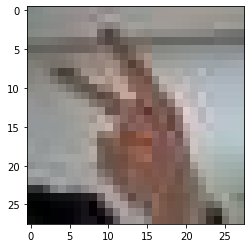

In [4]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

##### 5. 딥러닝 네트워크 설계하기

In [5]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                51232     
_________________________________________________________________
dense_1 (Dense)              (No

##### 6. 딥러닝 네트워크 학습시키기

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
94/94 [==============================] - 4s 44ms/step - loss: 3.3048 - accuracy: 0.5283
Epoch 2/10
94/94 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.7503
Epoch 3/10
94/94 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8280
Epoch 4/10
94/94 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8860
Epoch 5/10
94/94 [==============================] - 0s 1ms/step - loss: 0.2186 - accuracy: 0.9153
Epoch 6/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1640 - accuracy: 0.9397
Epoch 7/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1636 - accuracy: 0.9383
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.9620
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9667
Epoch 10/10
94/94 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.9750


##### 7. 테스트데이터들의 사이즈를 28X28로 바꿔주기 (2. 방법을 테스트데이터에 적용)

In [7]:
# 테스트데이터 경로 : "/aiffel/rock_scissor_paper1" 원래 것에 1을 추가!



# 테스트데이터: 가위


### 가위 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper1/scissor")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper1/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

### 가위 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")



## 테스트데이터: 바위


### 바위 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper1/rock")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper1/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

### 바위 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")



## 테스트데이터: 보


### 보 모든 파일 읽기 (경로: "/aiffel/rock_scissor_paper1/paper")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper1/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 보 모든 파일 28X28로 바꾸기
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper1/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper1/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper1/paper
보 이미지 resize 완료!


##### 8. 라벨링 (가위: 0, 바위: 1, 보: 2)과 x_test 데이터 정규화 (3. 방법을 테스트데이터에 적용)

In [8]:
# Load_data 함수 => Load_tdata 함수로 변경하여 정의


def load_tdata(img_path): 
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300  # test 데이터 300개
    img_size=28 # 28X28
    color=3 # RGB
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpeg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpeg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpeg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper1"
(x_test, y_test)=load_tdata(image_dir_path)
x_test_norm = x_test/255.0   # x_test를 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


##### 9. 테스트데이터 한 장 불러와보기 

라벨:  0


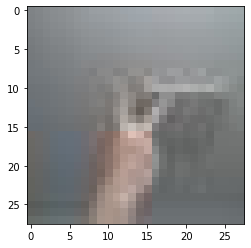

In [9]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

##### 10. 훈련데이터로 학습시킨 모델로 테스트데이터의 정확도(Acccuracy) 측정

In [10]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 2s - loss: 1.1425 - accuracy: 0.6100
test_loss: 1.142523169517517 
test_accuracy: 0.6100000143051147


##### 11. 첫 번째 x_test에 대해서 어떻게 예측했는지 확인

In [12]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 확인 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.91560626 0.07595892 0.00843485]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


##### 12. 잘못 분류한 것(예측한 것)에 대해서 어떤 문제가 있는지 확인)

예측확률분포: [0.9353361  0.04529682 0.01936707]
라벨: 2, 예측결과: 0


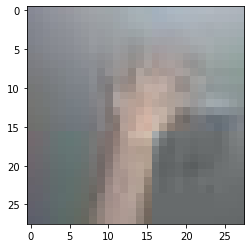

예측확률분포: [0.9353361  0.04529682 0.01936707]
라벨: 2, 예측결과: 0


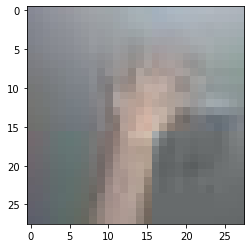

예측확률분포: [0.77148145 0.13710909 0.09140946]
라벨: 2, 예측결과: 0


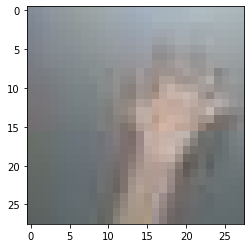

예측확률분포: [0.7152107 0.2802596 0.0045298]
라벨: 1, 예측결과: 0


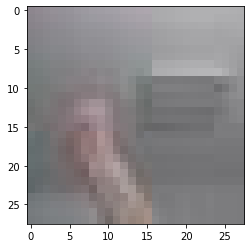

예측확률분포: [0.04369763 0.8650393  0.09126303]
라벨: 2, 예측결과: 1


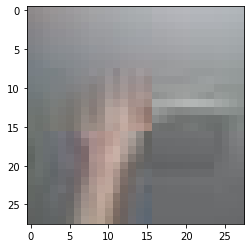

In [13]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 보기
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아보기
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### Disscussion

데이터를 reshape하는 과정은 생략하였는데 그 이유는 레이어에 입력할 때 데이터의 수(n=3000)와 크기(28X28), 채널수(RGB이므로 3)을 미리 설정해주었기에 다시 설정해줄 필요가 없기 때문이다.

맨 처음 훈련데이터를 300개로 하고 Conv2D와 Dense의 하이퍼파라미터를 16, 32, 32로 주었을 때 테스트데이터의 분류 정확도가 0.333 정도에 머물렀었다.

훈련데이터의 퀄리티를 높이기 위해 화질이 높은 이미지로 대체하였음에도 똑같은 결과가 반복되었다. 이에 데이터의 양을 10배로 늘리고 (총 훈련데이터의 양 3000개), 최적의 하이퍼파라미터 32, 64, 32를 찾아내었다. 

Conv2D는 얼마나 다양한 이미지의 특징을 살펴볼 것인지를 결정하는 것이라고 하였는데 다양한 사람들 (10명)이 다양한 배경에서 찍었기에 2배씩 올려보았다.

Dense는 클래스의 개수가 많을수록 크게 주어야 한다는데 3개이므로 적당하다고 판단하여 그대로 두었다.

그 결과,
훈련데이터(Training data)로 학습시켰을 때 모델의 정확도(Accuracy)는 0.975이다.
만약 1이 되었다면 모델이 overfitting이 될 가능성이 높다.

훈련된 모델로 테스트데이터(Test data)를 분류해보았을 때 정확도는 0.6100000143051147이다.
훈련데이터에 비해 높지는 않다.

원인을 분석해보기 위해 데이터를 직접 관찰해보니 사진의 화질이 너무 안좋아서 사람이 봐도 구분하기 조금 힘든 것들이 많아 보인다. 따라서, overfitting이라고 판단하기보다는 화질이 낮아서라고 판단하는 것이 좋을 듯 하다.